In [23]:
import numpy as np
from torchvision.datasets import MNIST
from scipy.special import expit
import matplotlib.pyplot as plt

In [24]:
# 加载MNIST数据集
mnist_train = MNIST(root="./data", train=True, download=True)
mnist_test = MNIST(root="./data", train=False, download=True)

# 标准化和重塑数据
X_train = (mnist_train.data.float() / 255.0).reshape(-1, 784)
X_test = (mnist_test.data.float() / 255.0).reshape(-1, 784)


# 转换标签为独热编码
y_train = np.eye(10)[mnist_train.targets.numpy()]
y_test = np.eye(10)[mnist_test.targets.numpy()]

# 打印检查数据的形状
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: torch.Size([60000, 784])
y_train shape: (60000, 10)
X_test shape: torch.Size([10000, 784])
y_test shape: (10000, 10)


In [25]:
class MLP:
    def __init__(
        self, num_input_node, num_hidden_node, num_output_node, learning_rate=0.01
    ):
        """initialize the multi-layer perceptron

        Args:
            num_input_node: number of input nodes
            num_hidden_node: number of hidden nodes
            num_output_node: number of output nodes
            learning_rate: learning rate. Defaults to 0.01
        """
        self.num_input_node = num_input_node
        self.num_hidden_node = num_hidden_node
        self.num_output_node = num_output_node
        self.wih = np.random.normal(
            0.0,
            pow(self.num_hidden_node, -0.5),
            (self.num_input_node, self.num_hidden_node),
        )
        self.who = np.random.normal(
            0.0,
            pow(self.num_output_node, -0.5),
            (self.num_hidden_node, self.num_output_node),
        )
        self.lr = learning_rate
        self.activation_function = lambda x: expit(x)

    def lawer(self, data):
        hidden_layer_output = self.activation_function(np.dot(data, self.wih))
        output_layer_output = self.activation_function(
            np.dot(hidden_layer_output, self.who)
        )
        return output_layer_output

    def cross_entropy_loss(self, y_pred, y_true):
        n_samples = y_true.shape[0]
        y_pred_clipped = np.clip(y_pred, 1e-12, 1 - 1e-12)
        correct_log_probs = -np.log(
            y_pred_clipped[range(n_samples), y_true.argmax(axis=1)]
        )
        loss = np.sum(correct_log_probs) / n_samples
        return loss

    def accuracy(self, y_pred, y_true):
        predictions = np.argmax(y_pred, axis=1)
        return np.mean(predictions == y_true.argmax(axis=1))

    def train(self, train_data, train_labels, test_data, test_labels, epochs=100):
        accuracy_list = []
        epoch_list = []
        for epoch in range(epochs):
            # 预测输出
            hidden_layer_output = self.activation_function(np.dot(train_data, self.wih))
            output_layer_output = self.activation_function(
                np.dot(hidden_layer_output, self.who)
            )

            loss = self.cross_entropy_loss(output_layer_output, train_labels)

            # 反向传播
            n_samples = X_train.shape[0]
            output_error = output_layer_output - train_labels
            output_error /= n_samples

            d_weights_hidden_to_output = np.dot(hidden_layer_output.T, output_error)
            hidden_error = np.dot(output_error, self.who.T) * self.activation_function(
                hidden_layer_output
            )
            d_weights_input_to_hidden = np.dot(X_train.T, hidden_error)

            # 更新权重
            self.wih -= self.lr * d_weights_input_to_hidden
            self.who -= self.lr * d_weights_hidden_to_output

            # 计算训练集上的准确率
            train_acc = self.accuracy(output_layer_output, train_labels)
            accuracy_list.append(train_acc)
            epoch_list.append(epoch)
            print(
                f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Accuracy: {train_acc:.4f}"
            )
            if epoch % 100 == 0:
                test_output_layer_output = self.lawer(test_data)
                test_acc = self.accuracy(test_output_layer_output, test_labels)
                print(f"Test Accuracy: {test_acc:.4f}")
        plt.figure(figsize=(10, 6))
        plt.plot(epoch_list, accuracy_list, color="red")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.ylim((0, 1))
        plt.title("Training Accuracy")
        plt.show()

    def test(self, test_data, test_labels):
        output_layer_output = self.lawer(test_data)
        test_acc = self.accuracy(output_layer_output, test_labels)
        print(f"Test Accuracy: {test_acc:.4f}")
        return test_acc

Epoch 1/10000, Loss: 1.0650, Accuracy: 0.1036
Test Accuracy: 0.1031
Epoch 2/10000, Loss: 1.1224, Accuracy: 0.1040
Epoch 3/10000, Loss: 1.1791, Accuracy: 0.1052
Epoch 4/10000, Loss: 1.2340, Accuracy: 0.1070
Epoch 5/10000, Loss: 1.2874, Accuracy: 0.1097
Epoch 6/10000, Loss: 1.3396, Accuracy: 0.1133
Epoch 7/10000, Loss: 1.3905, Accuracy: 0.1188
Epoch 8/10000, Loss: 1.4393, Accuracy: 0.1263
Epoch 9/10000, Loss: 1.4853, Accuracy: 0.1344
Epoch 10/10000, Loss: 1.5279, Accuracy: 0.1431
Epoch 11/10000, Loss: 1.5668, Accuracy: 0.1519
Epoch 12/10000, Loss: 1.6020, Accuracy: 0.1606
Epoch 13/10000, Loss: 1.6337, Accuracy: 0.1689
Epoch 14/10000, Loss: 1.6622, Accuracy: 0.1766
Epoch 15/10000, Loss: 1.6877, Accuracy: 0.1839
Epoch 16/10000, Loss: 1.7105, Accuracy: 0.1919
Epoch 17/10000, Loss: 1.7308, Accuracy: 0.1991
Epoch 18/10000, Loss: 1.7488, Accuracy: 0.2073
Epoch 19/10000, Loss: 1.7648, Accuracy: 0.2151
Epoch 20/10000, Loss: 1.7790, Accuracy: 0.2230
Epoch 21/10000, Loss: 1.7915, Accuracy: 0.2311


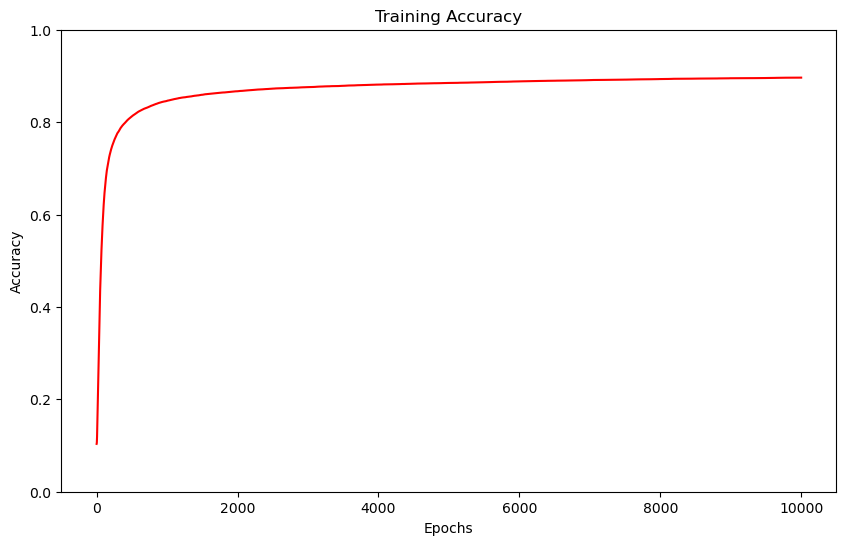

In [27]:
mlp = MLP(784, 100, 10)
mlp.train(X_train, y_train, X_test, y_test, epochs=10000)